<h1 style="color:lime;">INTELIGENZA ARTIFICIALE AI<br>TECNICA DI ONE HOTE <br>RETE FEEDFORWARD</br>RETE NEURALE RNN </h1>

<p style='color:blue;'>Stagisti Corso Addetto alla logistica automatica ambito IOT
FORIT GROUP , POLITECNICO RIZZO
AGENZIA GI GROUP</p><br><p style='color:blue;'>Anno 09/05/2022 – 27/05/2022 </p>

<p style='color:blue;'>Autori del codice <br>Valentina<br>Salvatore<br>Paola<br>Fabrizzio</p>

In [3]:
import random
import math

# -----------------------------
# Funzioni
# -----------------------------
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_deriv_from_activation(a):
    return a * (1 - a)

def softmax(x):
    e_x = [math.exp(i) for i in x]
    somma = sum(e_x)
    return [i / somma for i in e_x]

# -----------------------------
# Input utente
# -----------------------------
input_utente = input("Inserisci una frase: ").lower()
parole_input = input_utente.split()

dati = {
    "tag": "salutare",
    "partens": ['ciao', 'come', 'stai', 'ciao'],
    "response": ['bene, grazie, tutto bene']
}

# Vocabolario unico
vocabolario = []
for parola in dati['partens']:
    if parola not in vocabolario:
        vocabolario.append(parola)

# One-hot encoding
one_hot = [1 if parola in parole_input else 0 for parola in vocabolario]

# -----------------------------
# Parametri rete
# -----------------------------
epoche = 500
rate = 0.8
neuroni = 100  # neuroni dello stato nascosto

# Target (esempio)
target = [0] * len(vocabolario)
target[0] = 1

# Pesi feedforward
pesi = [[random.uniform(0, 0.1) for _ in range(neuroni)] for _ in range(len(vocabolario))]
bias = [random.uniform(0, 0.2) for _ in range(neuroni)]

output_per_parola = {parola: [] for parola in vocabolario}
Out_RNN = []

# -----------------------------
# Addestramento feedforward
# -----------------------------
for iterate_epoche in range(epoche):
    for vocabolo in range(len(vocabolario)):
        one = one_hot[vocabolo]
        for n in range(neuroni):
            z1 = pesi[vocabolo][n] * one + bias[n]
            a1 = sigmoid(z1)
            errore = a1 - target[vocabolo]
            derivata_sigmoid = sigmoid_deriv_from_activation(a1)

            pesi[vocabolo][n] -= rate * errore * derivata_sigmoid * one
            bias[n] -= rate * errore * derivata_sigmoid

            output_per_parola[vocabolario[vocabolo]].append(a1)

        Out_RNN.append(sum(output_per_parola[vocabolario[vocabolo]]) / len(output_per_parola[vocabolario[vocabolo]]))

# -----------------------------
# Inizializzazione RNN
# -----------------------------
WT = [random.uniform(0, 0.2) for _ in range(neuroni)]
WH = [random.uniform(0, 0.2) for _ in range(neuroni)]
bias_t = [random.uniform(0, 0.2) for _ in range(neuroni)]
hidden_state = [0.0 for _ in range(neuroni)]

# Layer di output che mappa hidden_state al vocabolario
W_out = [[random.uniform(0, 0.2) for _ in range(neuroni)] for _ in range(len(vocabolario))]
b_out = [random.uniform(0, 0.2) for _ in range(len(vocabolario))]

# -----------------------------
# Funzione RNN
# -----------------------------
def RNN(Out_RNN, hidden_state):
    nuovo_hidden = []
    for n in range(neuroni):
        somma = 0.0
        for i in range(len(Out_RNN)):
            somma += math.tanh(WT[n] * Out_RNN[i] + WH[n] * hidden_state[n] + bias_t[n])
        nuovo_hidden.append(somma / len(Out_RNN))
    return nuovo_hidden

# -----------------------------
# Aggiornamento RNN
# -----------------------------
hidden_state = RNN(Out_RNN, hidden_state)
print("Stato RNN finale (primi 10 neuroni):", hidden_state[:10], "...")

# -----------------------------
# Calcolo output sul vocabolario
# -----------------------------
logits = []
for j in range(len(vocabolario)):
    somma = 0.0
    for i in range(neuroni):
        somma += hidden_state[i] * W_out[j][i]
    logits.append(somma + b_out[j])

# Softmax per probabilità
output_prob = softmax(logits)
print("Probabilità softmax:", output_prob)

# Scelta parola più probabile
parola_scelta = vocabolario[output_prob.index(max(output_prob))]
print("Parola di risposta:", parola_scelta)

Inserisci una frase:  ciao


Stato RNN finale (primi 10 neuroni): [0.04301944980217444, 0.23394771685467985, 0.2394103583745798, 0.07474858801253517, 0.1823846682279911, 0.20205350605764238, 0.12793068879700373, 0.05195283479111866, 0.09960316484127794, 0.11793933177024733] ...
Probabilità softmax: [0.3585206030313365, 0.32554152121907526, 0.3159378757495883]
Parola di risposta: ciao


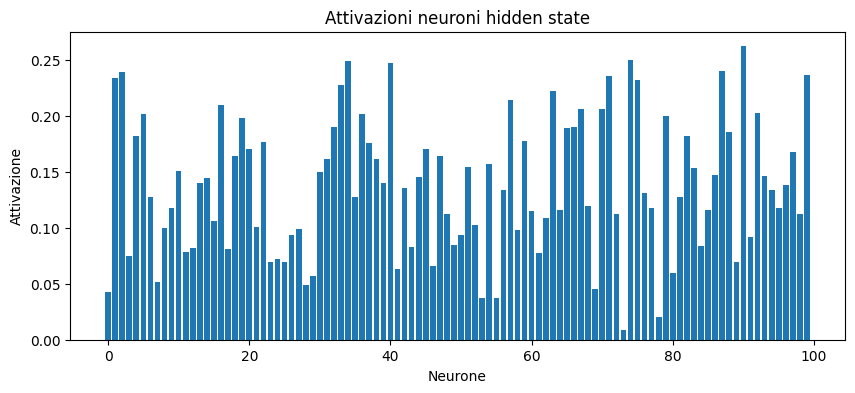

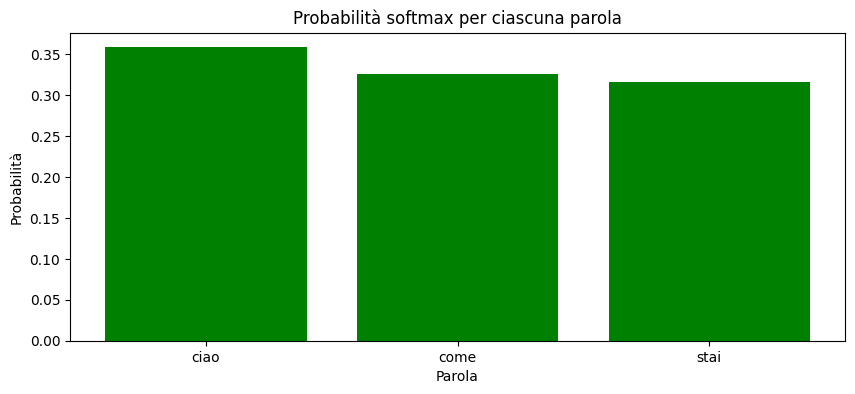

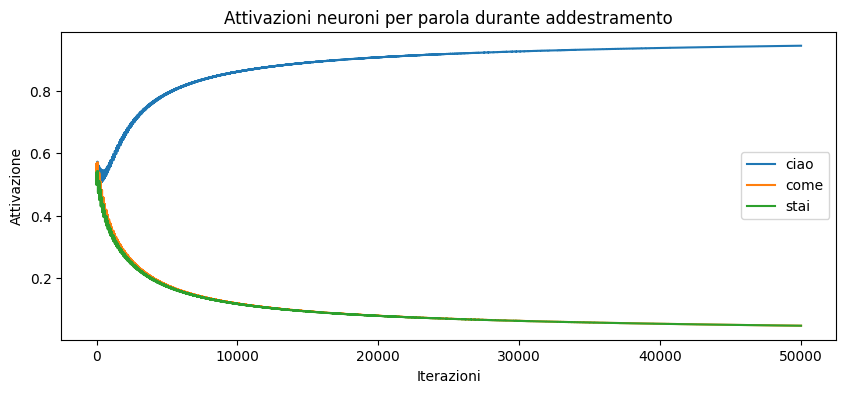

In [4]:
import matplotlib.pyplot as plt

# --- Grafico 1: attivazioni dei neuroni hidden ---
plt.figure(figsize=(10, 4))
plt.bar(range(len(hidden_state)), hidden_state)
plt.title("Attivazioni neuroni hidden state")
plt.xlabel("Neurone")
plt.ylabel("Attivazione")
plt.show()

# --- Grafico 2: probabilità softmax sul vocabolario ---
plt.figure(figsize=(10, 4))
plt.bar(vocabolario, output_prob, color='green')
plt.title("Probabilità softmax per ciascuna parola")
plt.xlabel("Parola")
plt.ylabel("Probabilità")
plt.show()

# --- Grafico 3: output per parola durante addestramento (medie) ---
plt.figure(figsize=(10, 4))
for parola, out in output_per_parola.items():
    plt.plot(range(len(out)), out, label=parola)
plt.title("Attivazioni neuroni per parola durante addestramento")
plt.xlabel("Iterazioni")
plt.ylabel("Attivazione")
plt.legend()
plt.show()


<p>
1. Librerie
Il programma utilizza librerie per i calcoli matematici e per generare numeri casuali. I numeri casuali servono a inizializzare i pesi e i bias della rete neurale, mentre le funzioni matematiche servono per calcolare le attivazioni dei neuroni e le funzioni di attivazione come sigmoid, tanh e softmax.

2. Funzioni di attivazione

La sigmoid trasforma un numero qualsiasi in un valore tra 0 e 1, utile per decidere quanto un neurone “si attiva”.

La derivata della sigmoid serve per aggiornare i pesi della rete durante l’addestramento.

La softmax trasforma un insieme di valori in probabilità, così che le uscite possano essere interpretate come probabilità di ciascuna parola.

3. Input dell’utente

L’utente scrive una frase. La frase viene convertita in minuscolo e divisa in singole parole, per poter confrontare ogni parola con quelle presenti nel vocabolario della rete.

4. Dati di addestramento

Il programma ha un insieme di dati di esempio, con alcune parole e una risposta associata. Questi dati servono a insegnare alla rete a rispondere in maniera corretta. Per semplicità, ogni parola del vocabolario ha un “target” associato che indica quale parola vogliamo predire.

5. Vocabolario

Viene creato un elenco di parole uniche, eliminando duplicati. Questo elenco rappresenta tutte le parole che la rete conosce e può prevedere.

6. Codifica one-hot

Ogni parola dell’input dell’utente viene trasformata in un vettore di 0 e 1, dove 1 indica che la parola è presente nella frase e 0 indica che non lo è. Questo permette alla rete di lavorare con numeri invece che con parole.

Nota: esiste anche una tecnica più avanzata chiamata word embedding, che trasforma le parole in vettori continui di dimensione inferiore. A differenza del one-hot, gli embedding catturano somiglianze tra parole, quindi parole simili avranno vettori simili nello spazio. Una rete neurale può imparare automaticamente questi embedding a partire dai vettori one-hot.

7. Parametri della rete

Si definiscono:

Il numero di epoche, cioè quante volte addestrare la rete.

Il learning rate, che indica quanto i pesi vengono aggiornati a ogni passo.

Il numero di neuroni dello stato nascosto della RNN, cioè quanti neuroni memorizzano l’informazione durante l’elaborazione della frase.

Si inizializzano anche i pesi e i bias con valori casuali.

8. Addestramento feedforward

La rete calcola l’attivazione dei neuroni in base all’input, confronta il risultato con il target desiderato, calcola l’errore e aggiorna i pesi per ridurre quell’errore. Questo processo viene ripetuto molte volte per tutti i neuroni e tutte le parole del vocabolario. Alla fine, per ogni parola viene calcolata un’attivazione media da passare alla RNN.

9. Inizializzazione della RNN

La RNN ha dei pesi e dei bias specifici per aggiornare il suo stato nascosto, che inizialmente è azzerato. C’è anche un layer di output che serve a trasformare lo stato nascosto in un risultato che rappresenta la probabilità delle parole del vocabolario.

10. Funzionamento della RNN

La RNN aggiorna lo stato nascosto combinando le informazioni dell’input corrente (feedforward) e dello stato precedente. La funzione di attivazione usata è tanh, che restituisce valori tra -1 e 1. Lo stato nascosto finale contiene la “memoria” della frase inserita dall’utente.

11. Aggiornamento dello stato nascosto

Lo stato nascosto della RNN viene calcolato e rappresenta la conoscenza della frase elaborata dalla rete. Viene mostrato un estratto dei primi neuroni per visualizzare il contenuto dello stato.

12. Calcolo dell’output

Lo stato nascosto viene combinato con i pesi e i bias del layer di output per ottenere un insieme di valori chiamati “logit”. Questi valori vengono poi trasformati in probabilità tramite softmax. La parola con la probabilità più alta viene scelta come risposta della rete.

13. Sintesi del flusso

Il programma:

Riceve una frase dall’utente e la converte in numeri (one-hot o embedding).

Passa i numeri attraverso una rete feedforward per ottenere attivazioni iniziali.

Aggiorna lo stato nascosto di una RNN che memorizza le informazioni della frase.

Usa lo stato nascosto per calcolare la probabilità di ciascuna parola.

Restituisce la parola più probabile come risposta.
</p>
